In [14]:
import pandas as pd

file_path = 'GOOG.csv'
data = pd.read_csv(file_path)

In [15]:
data = data.drop(columns=['Adjusted Close'])
print(data.head())

         Date       Low      Open     Volume      High     Close
0  19-08-2004  2.390042  2.490664  897427216  2.591785  2.499133
1  20-08-2004  2.503118  2.515820  458857488  2.716817  2.697639
2  23-08-2004  2.716070  2.758411  366857939  2.826406  2.724787
3  24-08-2004  2.579581  2.770615  306396159  2.779581  2.611960
4  25-08-2004  2.587302  2.614201  184645512  2.689918  2.640104


In [16]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

n = len(data)
train_end = int(0.7 * n)
validation_end = int(0.85 * n)

train_data = data.iloc[:train_end]
validation_data = data.iloc[train_end:validation_end]
test_data = data.iloc[validation_end:]


print("Training set size:", len(train_data))
print("Validation set size:", len(validation_data))
print("Test set size:", len(test_data))

Training set size: 3228
Validation set size: 692
Test set size: 692


C:\Users\krroh\AppData\Local\Temp\ipykernel_6520\3799130189.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


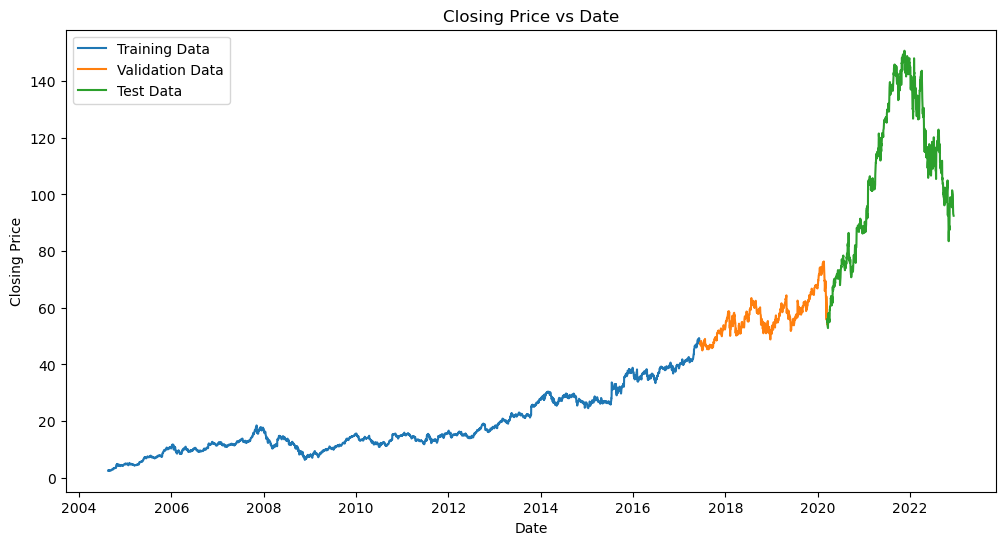

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(validation_data.index, validation_data['Close'], label='Validation Data')
plt.plot(test_data.index, test_data['Close'], label='Test Data')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs Date')
plt.legend()
plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))

train_normalized = scaler.fit_transform(train_data)
validation_normalized = scaler.transform(validation_data)
test_normalized = scaler.transform(test_data)

def generate_sequences(data, seq_len):
    sequences, targets = [], []
    for i in range(len(data) - seq_len):
        sequences.append(data[i:i + seq_len])
        targets.append(data[i + seq_len][4])
    return np.array(sequences), np.array(targets).reshape(-1, 1)

seq_len = 50

X_train, y_train = generate_sequences(train_normalized, seq_len)
X_val, y_val = generate_sequences(validation_normalized, seq_len)
X_test, y_test = generate_sequences(test_normalized, seq_len)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape, "y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (3178, 50, 5) y_train shape: (3178, 1)
X_val shape: (642, 50, 5) y_val shape: (642, 1)
X_test shape: (642, 50, 5) y_test shape: (642, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt



class SimpleRNNModel:
    def __init__(self, input_shape):
        self.model = Sequential([
            SimpleRNN(32, activation='tanh', input_shape=input_shape),
            Dense(1)
        ])

    def build_and_compile(self):
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def fit(self, train_features, train_labels, val_features, val_labels, epochs=20, batch_size=32):
        self.history = self.model.fit(
            train_features, train_labels,
            validation_data=(val_features, val_labels),
            epochs=epochs,
            batch_size=batch_size
        )

    def display_loss_plot(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

model = SimpleRNNModel(input_shape=(X_train.shape[1], X_train.shape[2]))
model.build_and_compile()

C:\Users\krroh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

class CustomLSTMModel:
    def __init__(self, input_shape):
        self.model = Sequential([
            LSTM(32, activation='tanh', input_shape=input_shape, return_sequences=False),
            Dense(1)
        ])

    def build_and_compile(self):
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def fit_model(self, train_features, train_labels, val_features, val_labels, epochs=20, batch_size=32):
        self.history = self.model.fit(
            train_features, train_labels,
            validation_data=(val_features, val_labels),
            epochs=epochs,
            batch_size=batch_size
        )

    def display_training_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Loss during Training and Validation (LSTM)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

lstm_model = CustomLSTMModel(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm_model.build_and_compile()


In [23]:
from tensorflow.keras.layers import GRU
class CustomGRUModel:
    def __init__(self, input_shape):
        self.model = Sequential([
            GRU(32, activation='tanh', input_shape=input_shape, return_sequences=False),
            Dense(1)
        ])

    def build_and_compile(self):
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def fit_model(self, train_features, train_labels, val_features, val_labels, epochs=20, batch_size=32):
        self.history = self.model.fit(
            train_features, train_labels,
            validation_data=(val_features, val_labels),
            epochs=epochs,
            batch_size=batch_size
        )

    def display_training_loss(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'], label='Train Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Loss during Training and Validation (GRU)')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid()
        plt.show()

gru_model = CustomGRUModel(input_shape=(X_train.shape[1], X_train.shape[2]))
gru_model.build_and_compile()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1272 - mae: 0.2025 - val_loss: 0.0330 - val_mae: 0.1608
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 7.1195e-04 - mae: 0.0179 - val_loss: 0.0178 - val_mae: 0.1121
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.0314e-04 - mae: 0.0137 - val_loss: 0.0139 - val_mae: 0.0998
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.5416e-04 - mae: 0.0114 - val_loss: 0.0086 - val_mae: 0.0736
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.0334e-04 - mae: 0.0102 - val_loss: 0.0063 - val_mae: 0.0606
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.6670e-04 - mae: 0.0093 - val_loss: 0.0053 - val_mae: 0.0557
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.4205e-04 - mae: 0.0087 - val_loss: 0.0046 - val_mae: 0.0525
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.3225e-04 - mae: 0.0083 - val_loss: 0.0034 - val_mae: 0.0431
Epoch 9/20
100/100 ━

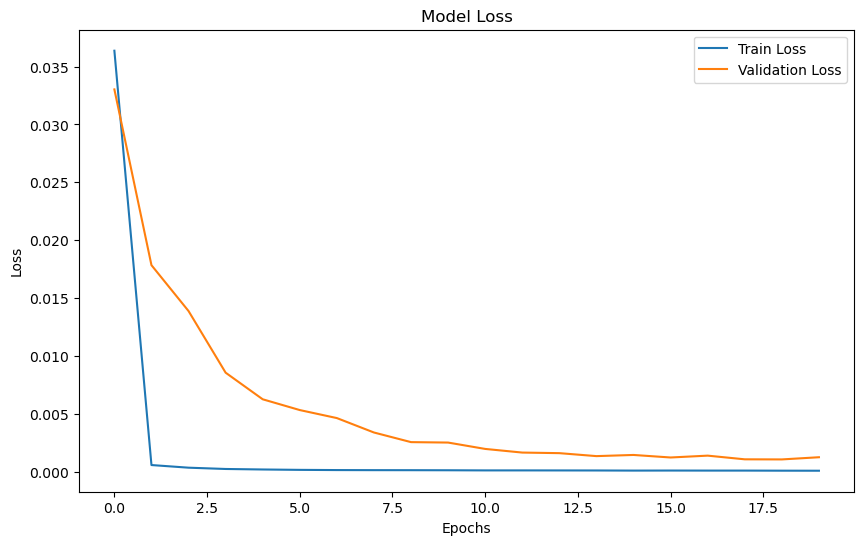

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0142 - mae: 0.0695 - val_loss: 0.0264 - val_mae: 0.1475
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.3107e-04 - mae: 0.0108 - val_loss: 0.0119 - val_mae: 0.0927
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 1.7988e-04 - mae: 0.0093 - val_loss: 0.0091 - val_mae: 0.0798
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.5241e-04 - mae: 0.0089 - val_loss: 0.0091 - val_mae: 0.0824
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 1.5120e-04 - mae: 0.0088 - val_loss: 0.0057 - val_mae: 0.0617
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 1.3951e-04 - mae: 0.0086 - val_loss: 0.0054 - val_mae: 0.0614
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.3098e-04 - mae: 0.0083 - val_loss: 0.0031 - val_mae: 0.0432
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 1.3425e-04 - mae: 0.0080 - val_loss: 0.0022 - val_mae: 0.0359
Epoch 9/20
100/100 ━

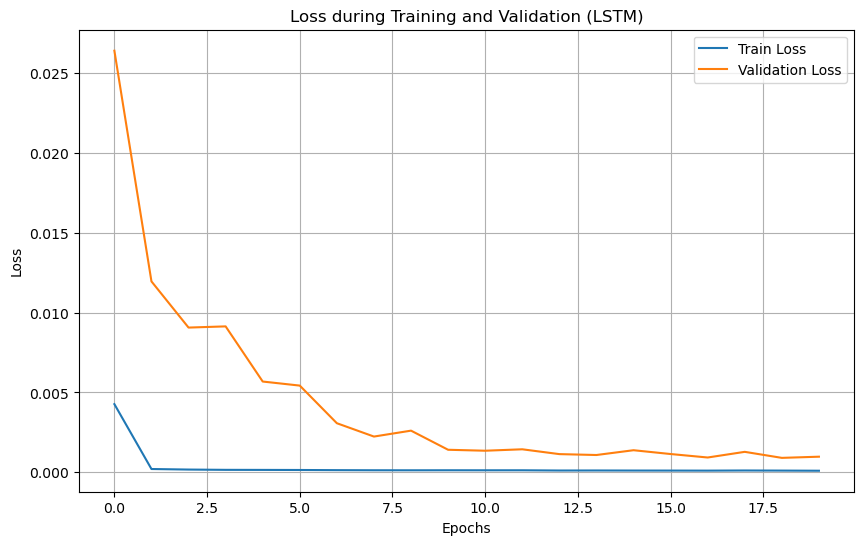

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.1837 - mae: 0.2872 - val_loss: 0.0208 - val_mae: 0.1347
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 4.8615e-04 - mae: 0.0173 - val_loss: 0.0041 - val_mae: 0.0524
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 2.5090e-04 - mae: 0.0116 - val_loss: 0.0035 - val_mae: 0.0480
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.7788e-04 - mae: 0.0099 - val_loss: 0.0024 - val_mae: 0.0382
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 1.6353e-04 - mae: 0.0091 - val_loss: 0.0026 - val_mae: 0.0396
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 1.3702e-04 - mae: 0.0085 - val_loss: 0.0023 - val_mae: 0.0370
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1.1403e-04 - mae: 0.0078 - val_loss: 0.0027 - val_mae: 0.0409
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 1.1833e-04 - mae: 0.0079 - val_loss: 0.0024 - val_mae: 0.0385
Epoch 9/20
100/100 ━

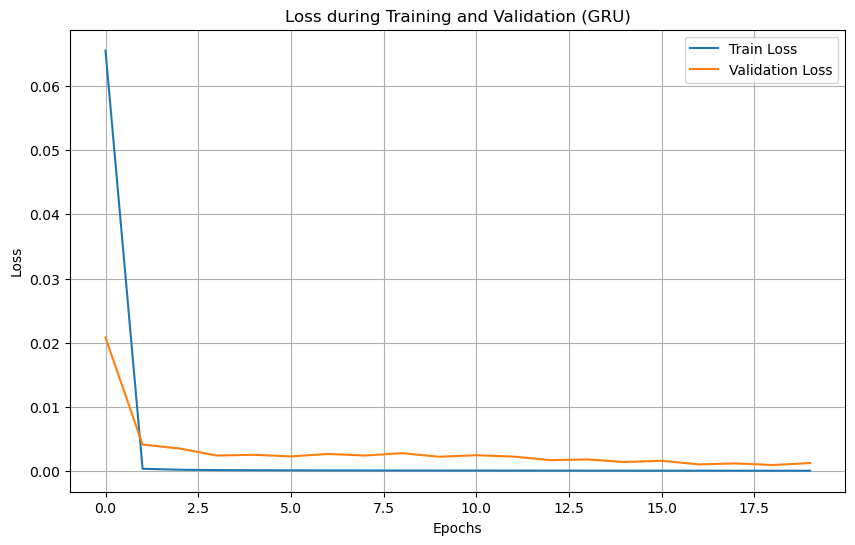

In [24]:
# Training the Simple RNN model
model.fit(X_train, y_train, X_val, y_val, epochs=20, batch_size=32)
model.display_loss_plot()

# Training the LSTM model
lstm_model.fit_model(X_train, y_train, X_val, y_val, epochs=20, batch_size=32)
lstm_model.display_training_loss()

# Training the GRU model
gru_model.fit_model(X_train, y_train, X_val, y_val, epochs=20, batch_size=32)
gru_model.display_training_loss()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Vanilla RNN Validation Metrics (Original Scale):
Mean Absolute Error (MAE): 1.183467923137642
Mean Squared Error (MSE): 2.7185781212307263
Root Mean Squared Error (RMSE): 1.6488111235768415
R-squared (R2): 0.9290179151578848


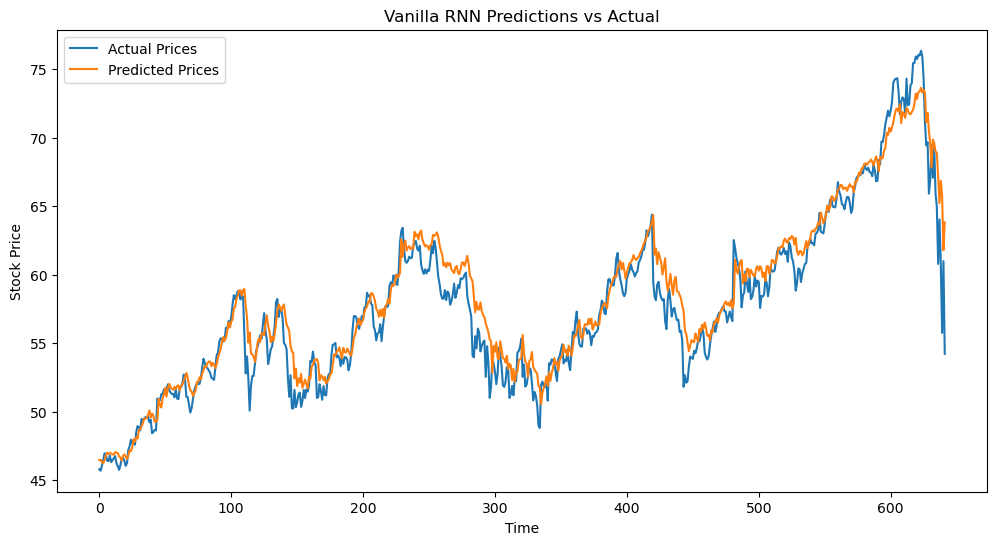

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate and print metrics
def calculate_metrics(y_actual, y_predicted):
    mae = mean_absolute_error(y_actual, y_predicted)
    mse = mean_squared_error(y_actual, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_actual, y_predicted)
    return mae, mse, rmse, r2

# Function to plot predictions vs actual
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual Prices')
    plt.plot(predicted, label='Predicted Prices')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Predicting with each model
vanilla_rnn_pred = model.model.predict(X_val)
lstm_pred = lstm_model.model.predict(X_val)
gru_pred = gru_model.model.predict(X_val)

# Rescaling back to original scale (only the 'Close' column)
vanilla_rnn_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_pred), data.shape[1] - 1)), vanilla_rnn_pred])
)[:, -1]

y_val_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_val), data.shape[1] - 1)), y_val])
)[:, -1]

# Calculating metrics for Vanilla RNN
vanilla_rnn_metrics = calculate_metrics(y_val_original, vanilla_rnn_pred_original)

# Printing metrics for Vanilla RNN
print("Vanilla RNN Validation Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {vanilla_rnn_metrics[0]}")
print(f"Mean Squared Error (MSE): {vanilla_rnn_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {vanilla_rnn_metrics[2]}")
print(f"R-squared (R2): {vanilla_rnn_metrics[3]}")

# Plotting predictions vs actual values for Vanilla RNN
plot_predictions(y_val_original, vanilla_rnn_pred_original, 'Vanilla RNN Predictions vs Actual')


LSTM Validation Metrics (Original Scale):
Mean Absolute Error (MAE): 1.1270638988749218
Mean Squared Error (MSE): 2.133979543417882
Root Mean Squared Error (RMSE): 1.460814684830996
R-squared (R2): 0.9442817861957734


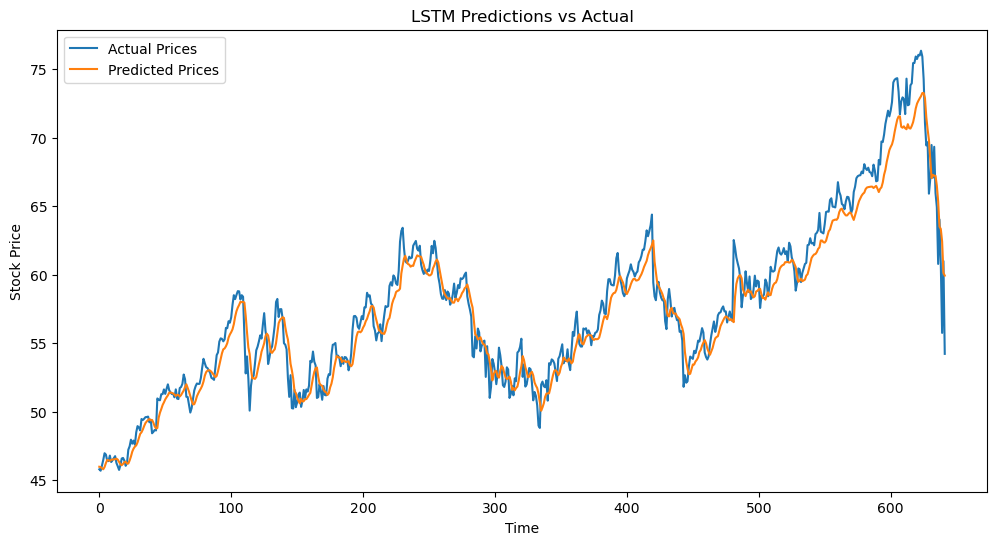

GRU Validation Metrics (Original Scale):
Mean Absolute Error (MAE): 1.2953658615056793
Mean Squared Error (MSE): 2.7610619734539448
Root Mean Squared Error (RMSE): 1.661644358295103
R-squared (R2): 0.9279086616185519


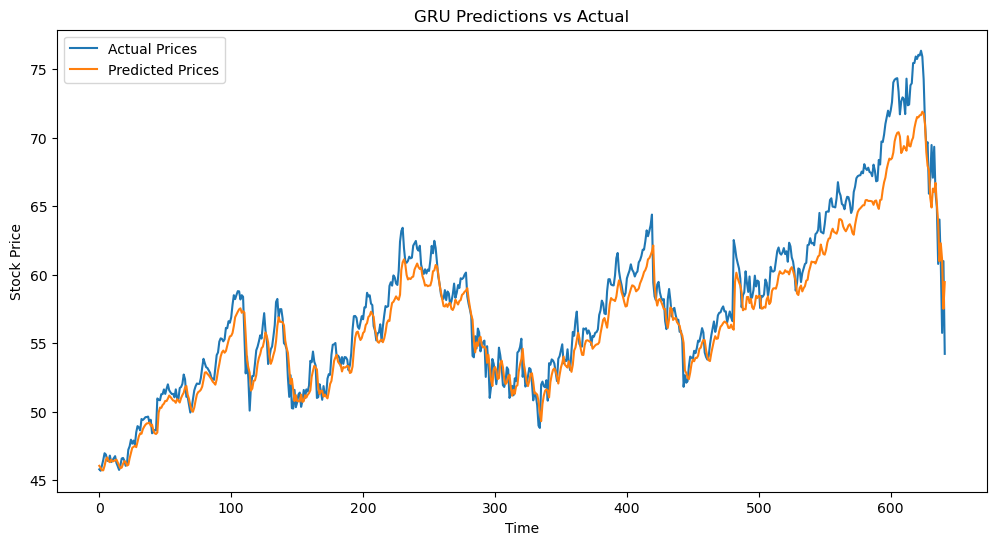

In [27]:
# Rescaling back to original scale for LSTM
lstm_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_pred), data.shape[1] - 1)), lstm_pred])
)[:, -1]

# Rescaling back to original scale for GRU
gru_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(gru_pred), data.shape[1] - 1)), gru_pred])
)[:, -1]

# Calculating metrics for LSTM
lstm_metrics = calculate_metrics(y_val_original, lstm_pred_original)
print("LSTM Validation Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {lstm_metrics[0]}")
print(f"Mean Squared Error (MSE): {lstm_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {lstm_metrics[2]}")
print(f"R-squared (R2): {lstm_metrics[3]}")

# Plotting predictions vs actual values for LSTM
plot_predictions(y_val_original, lstm_pred_original, 'LSTM Predictions vs Actual')

# Calculating metrics for GRU
gru_metrics = calculate_metrics(y_val_original, gru_pred_original)
print("GRU Validation Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {gru_metrics[0]}")
print(f"Mean Squared Error (MSE): {gru_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {gru_metrics[2]}")
print(f"R-squared (R2): {gru_metrics[3]}")

# Plotting predictions vs actual values for GRU
plot_predictions(y_val_original, gru_pred_original, 'GRU Predictions vs Actual')


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Vanilla RNN Test Metrics (Original Scale):
Mean Absolute Error (MAE): 28.095662631310784
Mean Squared Error (MSE): 1140.0396092313329
Root Mean Squared Error (RMSE): 33.76447258926656
R-squared (R2): -1.0148994325420118


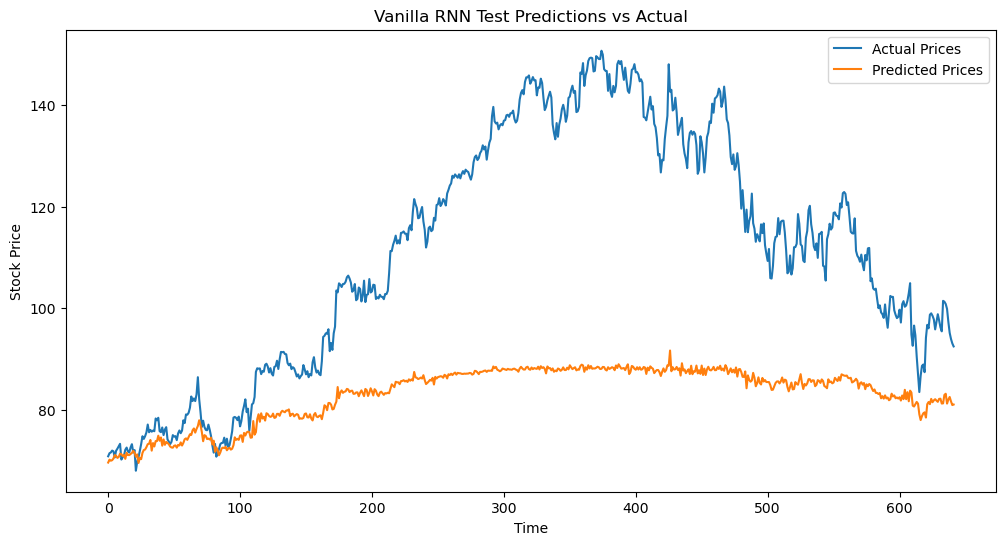

LSTM Test Metrics (Original Scale):
Mean Absolute Error (MAE): 17.78901893074674
Mean Squared Error (MSE): 457.8840036897188
Root Mean Squared Error (RMSE): 21.39822431160396
R-squared (R2): 0.19073845177490667


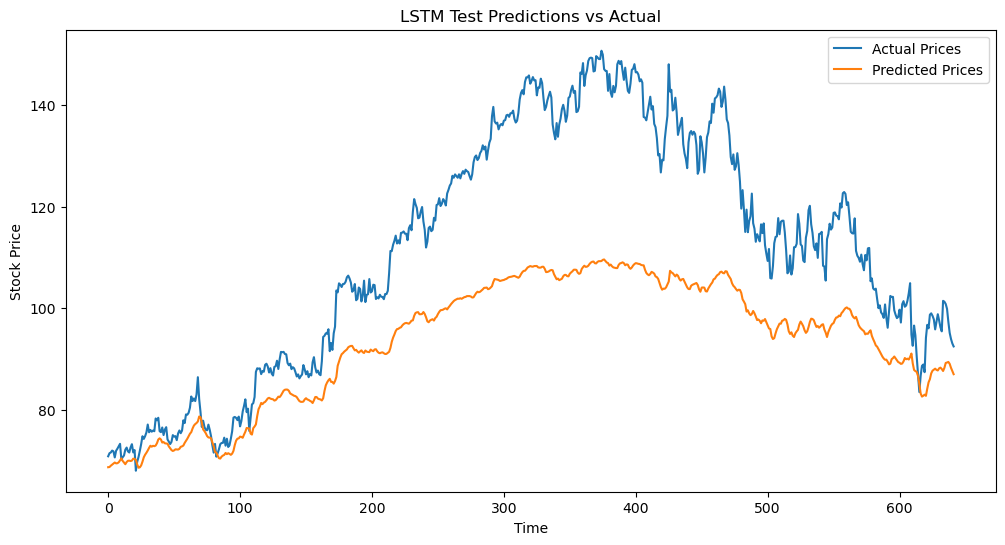

GRU Test Metrics (Original Scale):
Mean Absolute Error (MAE): 19.57388248581261
Mean Squared Error (MSE): 524.8227356896169
Root Mean Squared Error (RMSE): 22.90900992381855
R-squared (R2): 0.0724313227685599


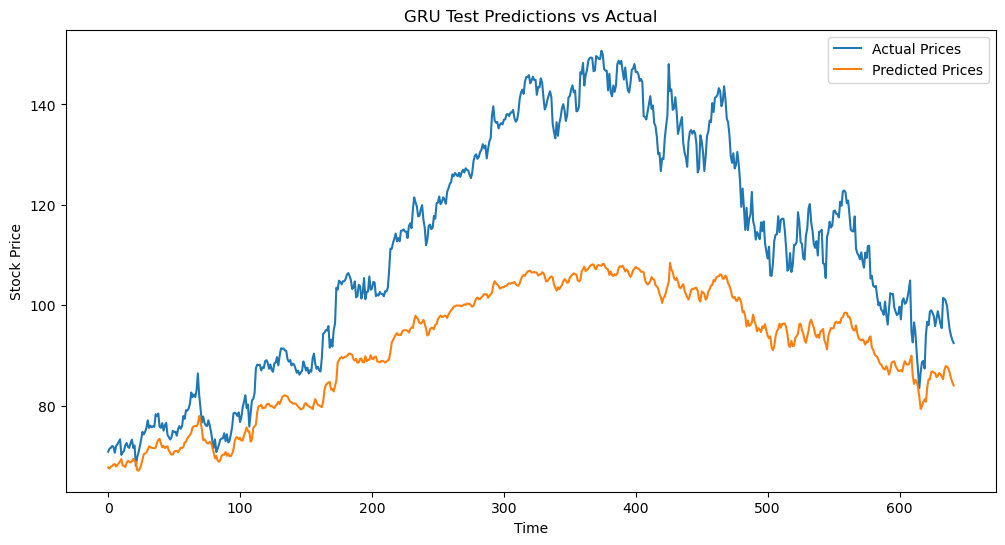

In [28]:
# Predicting on the test set with each model
vanilla_rnn_test_pred = model.model.predict(X_test)
lstm_test_pred = lstm_model.model.predict(X_test)
gru_test_pred = gru_model.model.predict(X_test)

# Rescaling back to original scale for test set predictions
vanilla_rnn_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_test_pred), data.shape[1] - 1)), vanilla_rnn_test_pred])
)[:, -1]

lstm_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_test_pred), data.shape[1] - 1)), lstm_test_pred])
)[:, -1]

gru_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(gru_test_pred), data.shape[1] - 1)), gru_test_pred])
)[:, -1]

y_test_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), data.shape[1] - 1)), y_test])
)[:, -1]

# Calculating metrics for Vanilla RNN on test set
vanilla_rnn_test_metrics = calculate_metrics(y_test_original, vanilla_rnn_test_pred_original)
print("Vanilla RNN Test Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {vanilla_rnn_test_metrics[0]}")
print(f"Mean Squared Error (MSE): {vanilla_rnn_test_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {vanilla_rnn_test_metrics[2]}")
print(f"R-squared (R2): {vanilla_rnn_test_metrics[3]}")

# Plotting predictions vs actual values for Vanilla RNN on test set
plot_predictions(y_test_original, vanilla_rnn_test_pred_original, 'Vanilla RNN Test Predictions vs Actual')

# Calculating metrics for LSTM on test set
lstm_test_metrics = calculate_metrics(y_test_original, lstm_test_pred_original)
print("LSTM Test Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {lstm_test_metrics[0]}")
print(f"Mean Squared Error (MSE): {lstm_test_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {lstm_test_metrics[2]}")
print(f"R-squared (R2): {lstm_test_metrics[3]}")

# Plotting predictions vs actual values for LSTM on test set
plot_predictions(y_test_original, lstm_test_pred_original, 'LSTM Test Predictions vs Actual')

# Calculating metrics for GRU on test set
gru_test_metrics = calculate_metrics(y_test_original, gru_test_pred_original)
print("GRU Test Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {gru_test_metrics[0]}")
print(f"Mean Squared Error (MSE): {gru_test_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {gru_test_metrics[2]}")
print(f"R-squared (R2): {gru_test_metrics[3]}")

# Plotting predictions vs actual values for GRU on test set
plot_predictions(y_test_original, gru_test_pred_original, 'GRU Test Predictions vs Actual')


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.1195e-05 - mae: 0.0059 - val_loss: 0.0010 - val_mae: 0.0226
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.7364e-05 - mae: 0.0058 - val_loss: 0.0012 - val_mae: 0.0250
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.8750e-05 - mae: 0.0064 - val_loss: 0.0013 - val_mae: 0.0255
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.5289e-05 - mae: 0.0065 - val_loss: 0.0011 - val_mae: 0.0229
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.6503e-05 - mae: 0.0058 - val_loss: 0.0011 - val_mae: 0.0234
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8222e-05 - mae: 0.0058 - val_loss: 0.0012 - val_mae: 0.0242
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.8571e-05 - mae: 0.0058 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.7194e-05 - mae: 0.0060 - val_loss: 0.0012 - val_mae: 0.0249
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━

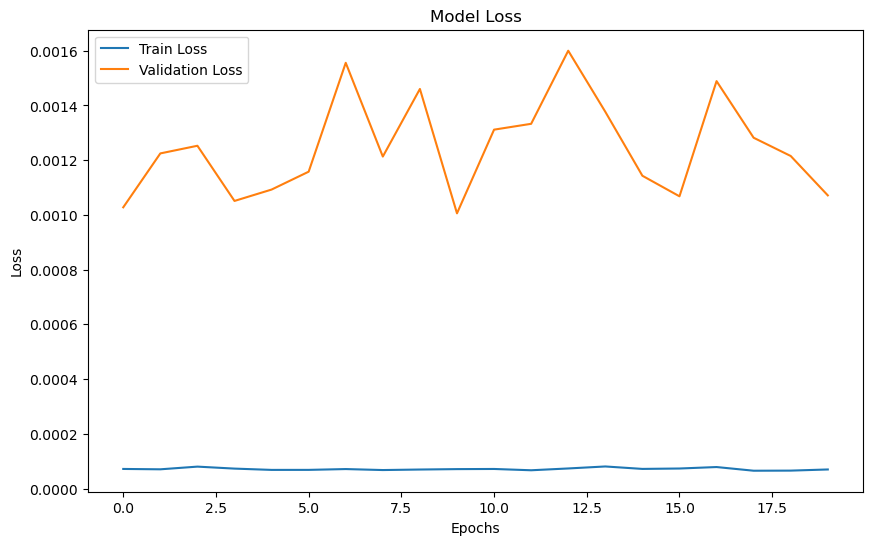

In [30]:
# Training Vanilla RNN model with batch size 64
model.fit(X_train, y_train, X_val, y_val, epochs=20, batch_size=64)
model.display_loss_plot()




Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.0107e-04 - mae: 0.0072 - val_loss: 8.8286e-04 - val_mae: 0.0225
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.5721e-05 - mae: 0.0068 - val_loss: 9.0336e-04 - val_mae: 0.0231
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8579e-05 - mae: 0.0069 - val_loss: 9.1308e-04 - val_mae: 0.0233
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.6844e-05 - mae: 0.0069 - val_loss: 8.4519e-04 - val_mae: 0.0221
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.0137e-05 - mae: 0.0066 - val_loss: 7.7285e-04 - val_mae: 0.0205
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.2954e-05 - mae: 0.0067 - val_loss: 8.3501e-04 - val_mae: 0.0221
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8049e-05 - mae: 0.0070 - val_loss: 7.4531e-04 - val_mae: 0.0198
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.4257e-05 - mae: 0.0069 - val_loss: 7.6331e-04 - val_mae: 0.0207


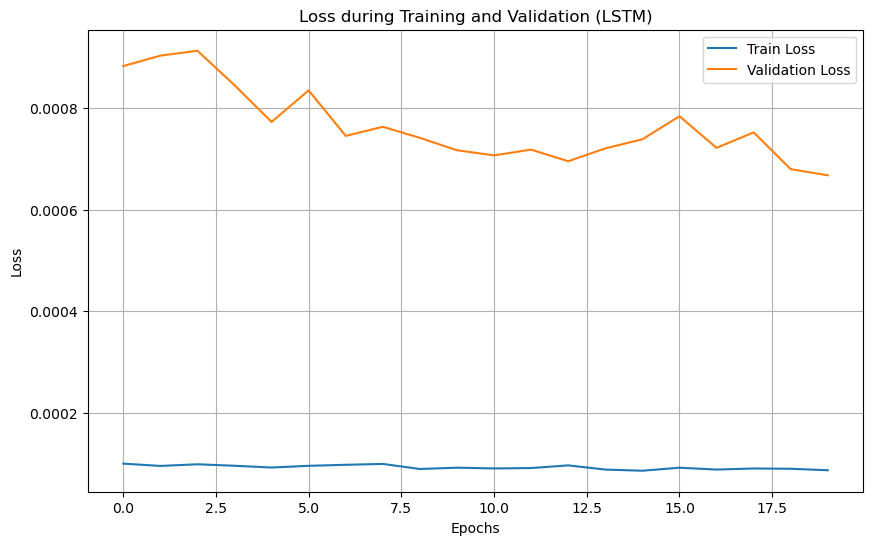

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.8271e-05 - mae: 0.0058 - val_loss: 0.0011 - val_mae: 0.0259
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.3060e-05 - mae: 0.0056 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.3950e-05 - mae: 0.0057 - val_loss: 9.2228e-04 - val_mae: 0.0225
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 7.0027e-05 - mae: 0.0059 - val_loss: 0.0010 - val_mae: 0.0240
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.2343e-05 - mae: 0.0055 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 6.3045e-05 - mae: 0.0055 - val_loss: 8.7681e-04 - val_mae: 0.0218
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.5840e-05 - mae: 0.0057 - val_loss: 0.0012 - val_mae: 0.0272
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.4833e-05 - mae: 0.0060 - val_loss: 8.9246e-04 - val_mae: 0.0222
Epoch 9/20
50/50 ━━━

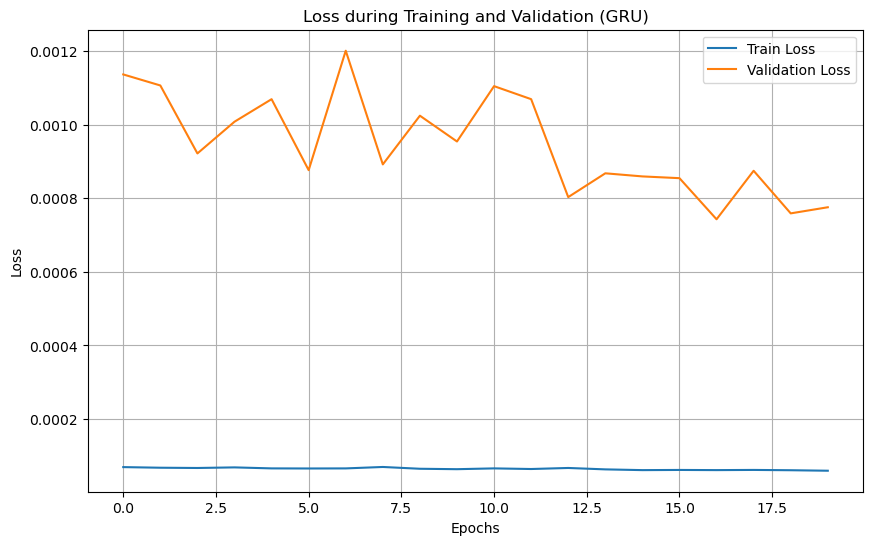

In [36]:


# Training LSTM model with batch size 64
lstm_model.fit_model(X_train, y_train, X_val, y_val, epochs=20, batch_size=64)
lstm_model.display_training_loss()

# Training GRU model with batch size 64
gru_model.fit_model(X_train, y_train, X_val, y_val, epochs=20, batch_size=64)
gru_model.display_training_loss()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Vanilla RNN Validation Metrics (Original Scale):
Mean Absolute Error (MAE): 1.0937138323671327
Mean Squared Error (MSE): 2.3359664643985
Root Mean Squared Error (RMSE): 1.5283868830889973
R-squared (R2): 0.9390079069387913


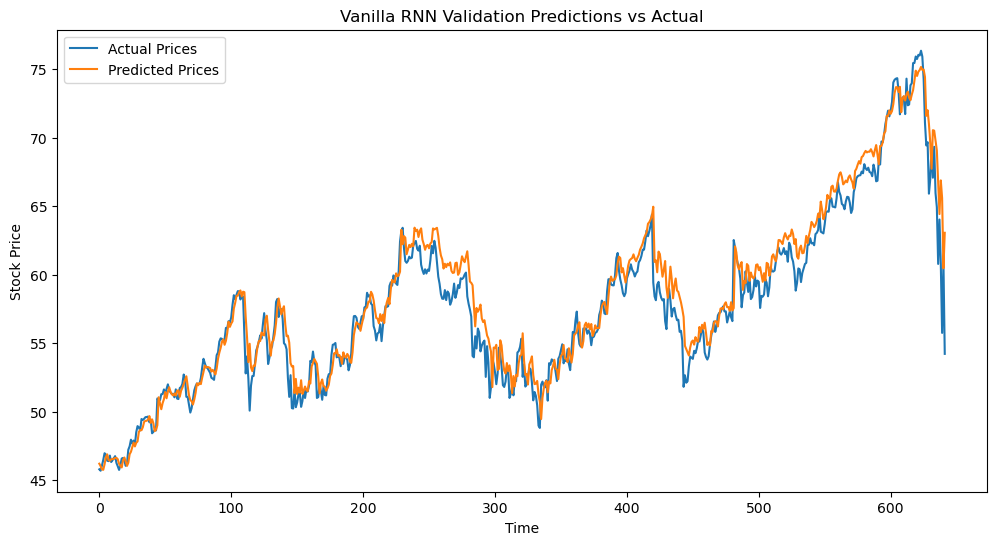

In [31]:
# Predicting on validation and test sets with the tuned Vanilla RNN model

# Validation predictions
vanilla_rnn_val_pred = model.model.predict(X_val)

# Rescaling predictions back to the original scale
vanilla_rnn_val_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_val_pred), data.shape[1] - 1)), vanilla_rnn_val_pred])
)[:, -1]

y_val_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_val), data.shape[1] - 1)), y_val])
)[:, -1]

# Calculate metrics for Vanilla RNN on validation set
vanilla_rnn_val_metrics = calculate_metrics(y_val_original, vanilla_rnn_val_pred_original)

# Print metrics for validation set
print("Vanilla RNN Validation Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {vanilla_rnn_val_metrics[0]}")
print(f"Mean Squared Error (MSE): {vanilla_rnn_val_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {vanilla_rnn_val_metrics[2]}")
print(f"R-squared (R2): {vanilla_rnn_val_metrics[3]}")

# Plot predictions vs actual for the validation set
plot_predictions(y_val_original, vanilla_rnn_val_pred_original, 'Vanilla RNN Validation Predictions vs Actual')


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Vanilla RNN Test Metrics (Original Scale):
Mean Absolute Error (MAE): 23.115533840710377
Mean Squared Error (MSE): 801.7965289747892
Root Mean Squared Error (RMSE): 28.31601188329298
R-squared (R2): -0.41709056261188016


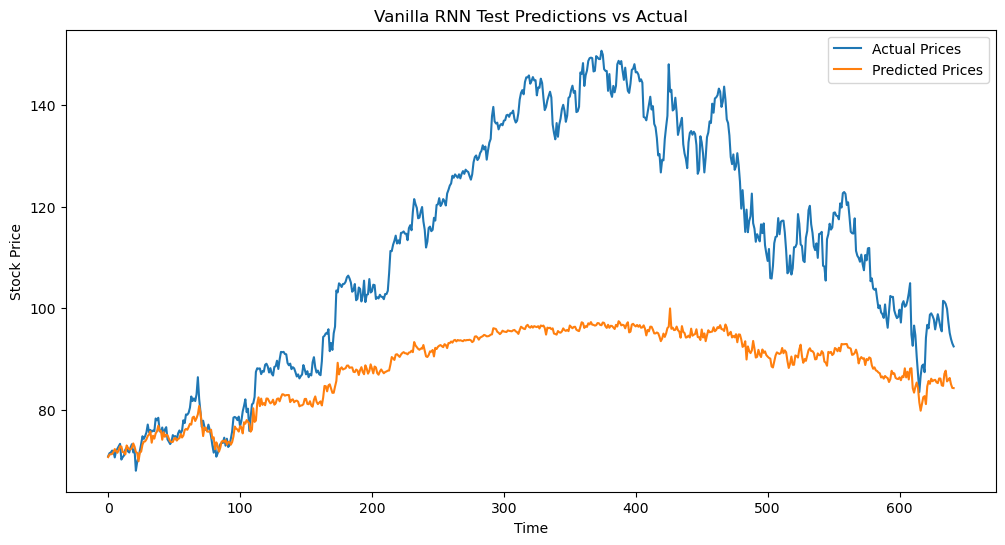

In [32]:
# Predicting on the test set with the tuned Vanilla RNN model

# Test predictions
vanilla_rnn_test_pred = model.model.predict(X_test)

# Rescaling predictions back to the original scale
vanilla_rnn_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_test_pred), data.shape[1] - 1)), vanilla_rnn_test_pred])
)[:, -1]

y_test_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), data.shape[1] - 1)), y_test])
)[:, -1]

# Calculate metrics for Vanilla RNN on test set
vanilla_rnn_test_metrics = calculate_metrics(y_test_original, vanilla_rnn_test_pred_original)

# Print metrics for test set
print("Vanilla RNN Test Metrics (Original Scale):")
print(f"Mean Absolute Error (MAE): {vanilla_rnn_test_metrics[0]}")
print(f"Mean Squared Error (MSE): {vanilla_rnn_test_metrics[1]}")
print(f"Root Mean Squared Error (RMSE): {vanilla_rnn_test_metrics[2]}")
print(f"R-squared (R2): {vanilla_rnn_test_metrics[3]}")

# Plot predictions vs actual for the test set
plot_predictions(y_test_original, vanilla_rnn_test_pred_original, 'Vanilla RNN Test Predictions vs Actual')


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


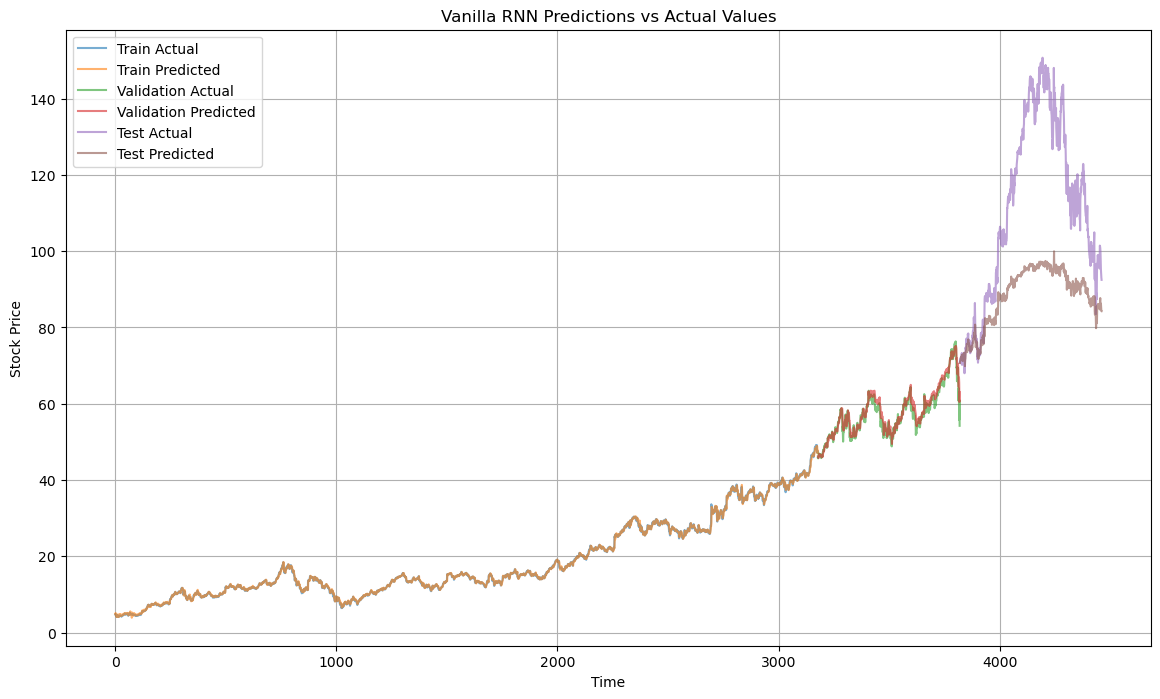

In [33]:
# Predicting for all sets (training, validation, and test) with the Vanilla RNN model

# Training predictions
vanilla_rnn_train_pred = model.model.predict(X_train)

# Validation predictions
vanilla_rnn_val_pred = model.model.predict(X_val)

# Test predictions
vanilla_rnn_test_pred = model.model.predict(X_test)

# Rescaling predictions back to the original scale

# Training set
vanilla_rnn_train_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_train_pred), data.shape[1] - 1)), vanilla_rnn_train_pred])
)[:, -1]

# Validation set
vanilla_rnn_val_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_val_pred), data.shape[1] - 1)), vanilla_rnn_val_pred])
)[:, -1]

# Test set
vanilla_rnn_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(vanilla_rnn_test_pred), data.shape[1] - 1)), vanilla_rnn_test_pred])
)[:, -1]

# Rescaling ground truth values
y_train_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_train), data.shape[1] - 1)), y_train])
)[:, -1]

y_val_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_val), data.shape[1] - 1)), y_val])
)[:, -1]

y_test_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(y_test), data.shape[1] - 1)), y_test])
)[:, -1]

# Plotting all predictions vs actual values
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_train_original)), y_train_original, label='Train Actual', alpha=0.6)
plt.plot(range(len(y_train_original)), vanilla_rnn_train_pred_original, label='Train Predicted', alpha=0.6)

plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), y_val_original, label='Validation Actual', alpha=0.6)
plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), vanilla_rnn_val_pred_original, label='Validation Predicted', alpha=0.6)

plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), y_test_original, label='Test Actual', alpha=0.6)
plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), vanilla_rnn_test_pred_original, label='Test Predicted', alpha=0.6)

plt.title('Vanilla RNN Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


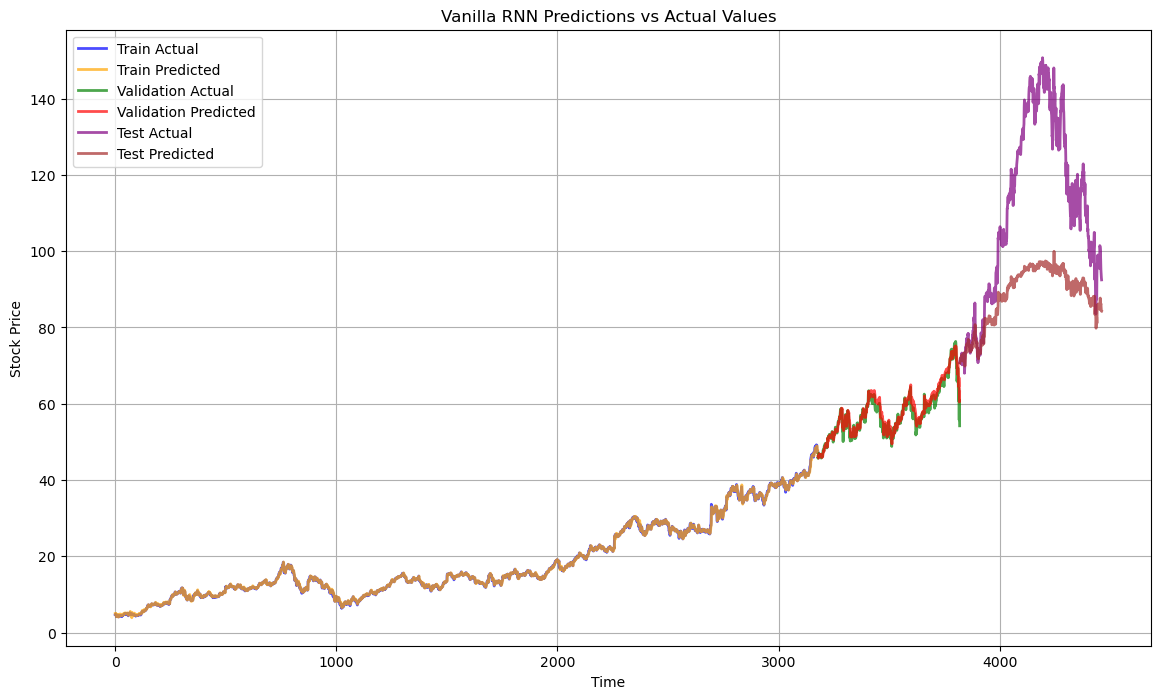

In [34]:
# Plotting all predictions vs actual values with customized line width and colors
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_train_original)), y_train_original, label='Train Actual', color='blue', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original)), vanilla_rnn_train_pred_original, label='Train Predicted', color='orange', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), y_val_original, label='Validation Actual', color='green', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), vanilla_rnn_val_pred_original, label='Validation Predicted', color='red', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), y_test_original, label='Test Actual', color='purple', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), vanilla_rnn_test_pred_original, label='Test Predicted', color='brown', linewidth=2, alpha=0.7)

plt.title('Vanilla RNN Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


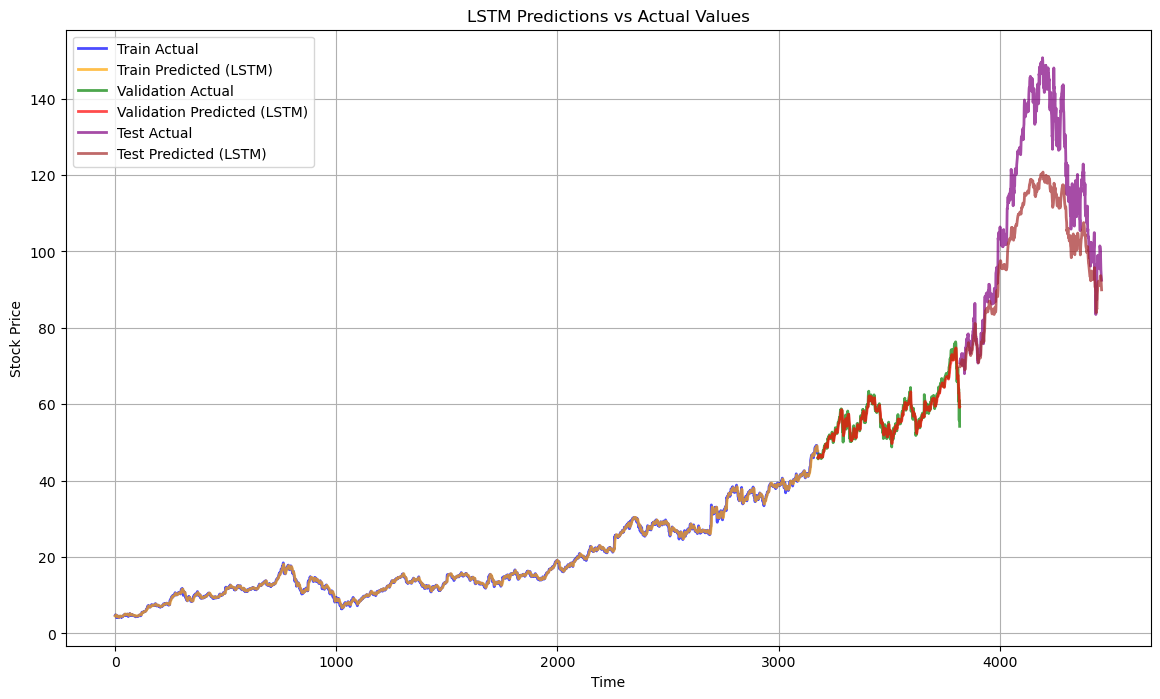

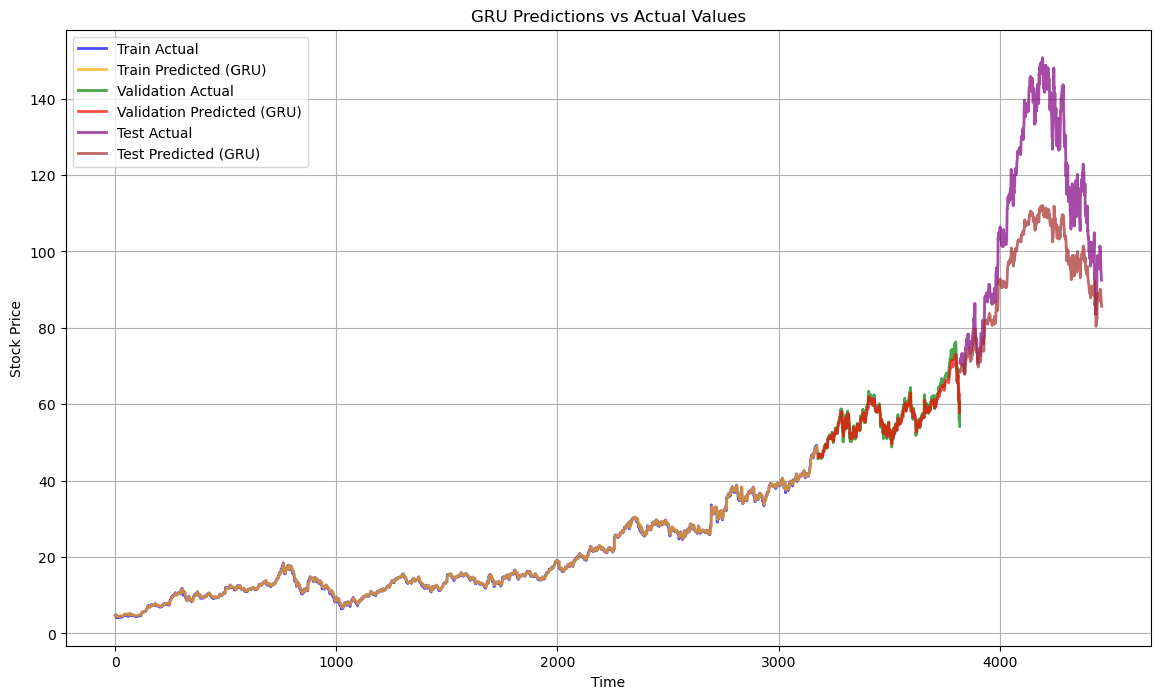

In [37]:
# Predicting for all sets (training, validation, and test) with LSTM and GRU models

# LSTM Predictions
lstm_train_pred = lstm_model.model.predict(X_train)
lstm_val_pred = lstm_model.model.predict(X_val)
lstm_test_pred = lstm_model.model.predict(X_test)

# GRU Predictions
gru_train_pred = gru_model.model.predict(X_train)
gru_val_pred = gru_model.model.predict(X_val)
gru_test_pred = gru_model.model.predict(X_test)

# Rescaling predictions back to the original scale

# LSTM
lstm_train_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_train_pred), data.shape[1] - 1)), lstm_train_pred])
)[:, -1]
lstm_val_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_val_pred), data.shape[1] - 1)), lstm_val_pred])
)[:, -1]
lstm_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(lstm_test_pred), data.shape[1] - 1)), lstm_test_pred])
)[:, -1]

# GRU
gru_train_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(gru_train_pred), data.shape[1] - 1)), gru_train_pred])
)[:, -1]
gru_val_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(gru_val_pred), data.shape[1] - 1)), gru_val_pred])
)[:, -1]
gru_test_pred_original = scaler.inverse_transform(
    np.hstack([np.zeros((len(gru_test_pred), data.shape[1] - 1)), gru_test_pred])
)[:, -1]

# Plotting all predictions vs actual values for LSTM
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_train_original)), y_train_original, label='Train Actual', color='blue', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original)), lstm_train_pred_original, label='Train Predicted (LSTM)', color='orange', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), y_val_original, label='Validation Actual', color='green', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), lstm_val_pred_original, label='Validation Predicted (LSTM)', color='red', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), y_test_original, label='Test Actual', color='purple', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), lstm_test_pred_original, label='Test Predicted (LSTM)', color='brown', linewidth=2, alpha=0.7)

plt.title('LSTM Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

# Plotting all predictions vs actual values for GRU
plt.figure(figsize=(14, 8))
plt.plot(range(len(y_train_original)), y_train_original, label='Train Actual', color='blue', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original)), gru_train_pred_original, label='Train Predicted (GRU)', color='orange', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), y_val_original, label='Validation Actual', color='green', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original), len(y_train_original) + len(y_val_original)), gru_val_pred_original, label='Validation Predicted (GRU)', color='red', linewidth=2, alpha=0.7)

plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), y_test_original, label='Test Actual', color='purple', linewidth=2, alpha=0.7)
plt.plot(range(len(y_train_original) + len(y_val_original), len(y_train_original) + len(y_val_original) + len(y_test_original)), gru_test_pred_original, label='Test Predicted (GRU)', color='brown', linewidth=2, alpha=0.7)

plt.title('GRU Predictions vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


In [38]:
# Calculating metrics for LSTM
lstm_train_metrics = calculate_metrics(y_train_original, lstm_train_pred_original)
lstm_val_metrics = calculate_metrics(y_val_original, lstm_val_pred_original)
lstm_test_metrics = calculate_metrics(y_test_original, lstm_test_pred_original)

# Calculating metrics for GRU
gru_train_metrics = calculate_metrics(y_train_original, gru_train_pred_original)
gru_val_metrics = calculate_metrics(y_val_original, gru_val_pred_original)
gru_test_metrics = calculate_metrics(y_test_original, gru_test_pred_original)

# Printing metrics for LSTM
print("LSTM Metrics (Original Scale):")
print(f"Train Metrics: MAE={lstm_train_metrics[0]}, MSE={lstm_train_metrics[1]}, RMSE={lstm_train_metrics[2]}, R2={lstm_train_metrics[3]}")
print(f"Validation Metrics: MAE={lstm_val_metrics[0]}, MSE={lstm_val_metrics[1]}, RMSE={lstm_val_metrics[2]}, R2={lstm_val_metrics[3]}")
print(f"Test Metrics: MAE={lstm_test_metrics[0]}, MSE={lstm_test_metrics[1]}, RMSE={lstm_test_metrics[2]}, R2={lstm_test_metrics[3]}")

# Printing metrics for GRU
print("\nGRU Metrics (Original Scale):")
print(f"Train Metrics: MAE={gru_train_metrics[0]}, MSE={gru_train_metrics[1]}, RMSE={gru_train_metrics[2]}, R2={gru_train_metrics[3]}")
print(f"Validation Metrics: MAE={gru_val_metrics[0]}, MSE={gru_val_metrics[1]}, RMSE={gru_val_metrics[2]}, R2={gru_val_metrics[3]}")
print(f"Test Metrics: MAE={gru_test_metrics[0]}, MSE={gru_test_metrics[1]}, RMSE={gru_test_metrics[2]}, R2={gru_test_metrics[3]}")


LSTM Metrics (Original Scale):
Train Metrics: MAE=0.28834282634093117, MSE=0.17454427757534416, RMSE=0.4177849657124394, R2=0.9983446679002922
Validation Metrics: MAE=0.9005435357481616, MSE=1.4558428403897856, RMSE=1.2065831261831013, R2=0.9619879380304321
Test Metrics: MAE=12.07703504727402, MSE=222.35208304034032, RMSE=14.911474878104457, R2=0.6070162103888743

GRU Metrics (Original Scale):
Train Metrics: MAE=0.24308063442993852, MSE=0.12841673918460622, RMSE=0.3583528138365963, R2=0.9987821293630189
Validation Metrics: MAE=0.9526357047791377, MSE=1.6916011760149487, RMSE=1.3006156911305309, R2=0.9558322870116542
Test Metrics: MAE=17.305404482956693, MSE=424.24313124817144, RMSE=20.597163184481776, R2=0.2501951357741533
